In [26]:
import requests
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [27]:
img = Image.open(f"./samples/1.jpg").convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(28, 28, 1)

In [28]:
API_KEY = "Dt-EkyRgxXR--1mhO8JnCjRGR_AvzoUpJQqbzFnWklU1" 

token_response = requests.post('https://iam.cloud.ibm.com/identity/token', 
                               data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})

mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [1,2,3], "values": [img_arr.tolist(), img_arr2.tolist(), img_arr3.tolist()]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/b5b0995e-f81a-4fe2-a439-1d67be573f97/predictions?version=2022-11-13', 
                                 json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'id': 'dense', 'fields': ['prediction', 'prediction_classes', 'probability'], 'values': [[[0.10263893753290176, 0.13590915501117706, 0.10020069032907486, 0.10125130414962769, 0.07670345902442932, 0.10627900809049606, 0.12735316157341003, 0.07338627427816391, 0.08290130645036697, 0.09337673336267471], 1, [0.10263893753290176, 0.13590915501117706, 0.10020069032907486, 0.10125130414962769, 0.07670345902442932, 0.10627900809049606, 0.12735316157341003, 0.07338627427816391, 0.08290130645036697, 0.09337673336267471]], [[0.0399966835975647, 0.36547935009002686, 0.16883213818073273, 0.03784506395459175, 0.11955533176660538, 0.037022486329078674, 0.06819450110197067, 0.10046767443418503, 0.04913046956062317, 0.013476299121975899], 1, [0.0399966835975647, 0.36547935009002686, 0.16883213818073273, 0.03784506395459175, 0.11955533176660538, 0.037022486329078674, 0.06819450110197067, 0.10046767443418503, 0.04913046956062317, 0.013476299121975899]], [[0.039996683597

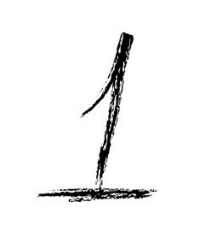

Result:  1


In [30]:
plt.imshow(plt.imread("./samples/1.jpg"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][0][1])